<a href="https://colab.research.google.com/github/maleeshag/Cardiovascular-Disease-Prediction-System/blob/main/Cardiovascular_Disease_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
#importing the models
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#for checking the accuracies
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#regularization
from sklearn.pipeline import make_pipeline


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#import the data and organize them into columns
data = pd.read_csv('/content/drive/MyDrive/DataSets/cardio_train/cardio_train.csv',delimiter=';')

In [9]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [10]:
#number of rows
data.shape

(70000, 13)

In [11]:
#finding the missing values
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
#no of duplicated rows
data.duplicated().sum()

0

<Axes: >

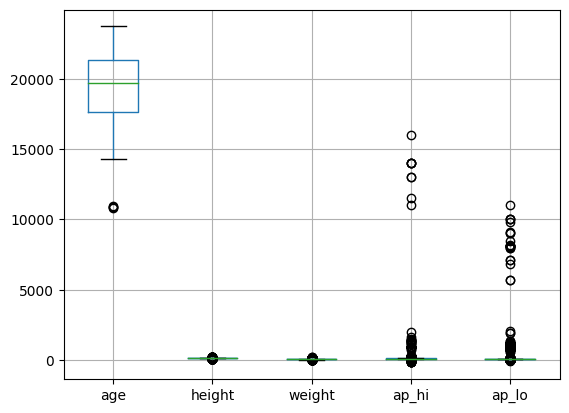

In [14]:
#checking the outliers of the neumerical data
data[["age","height","weight","ap_hi","ap_lo"]].boxplot()

ap_hi and ap_lo has the highest number of outliers

Feature Engineering

In [15]:
#in here age is in days , so lets represent age in years(365 days for year)
data["age"]=(data["age"]/365).values.astype(int)

In [16]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


instead of getting both height and weight we are going to get BMI value

 BMI = weight(Kg)/[height(m)]^2

In [17]:
#creating new column called BMI
data["BMI"]=data["weight"]/((data["height"]/100)**2)

In [18]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [19]:
#now we can drop height and weight and Id columns
data.drop(["height","weight",'id'],axis=1,inplace=True)

In [20]:
data.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,51,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
4,47,1,100,60,1,1,0,0,0,0,23.011177


In [21]:
data.isnull().sum()

age            0
gender         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
BMI            0
dtype: int64

<Axes: >

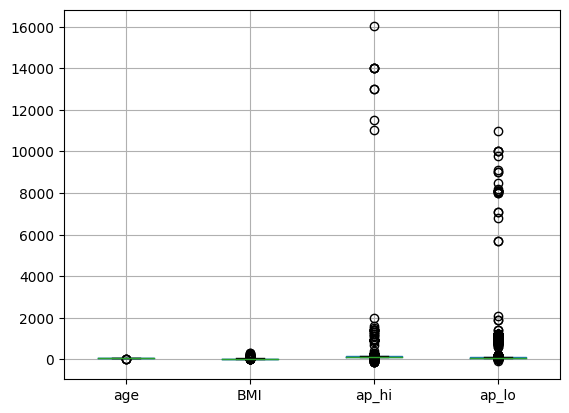

In [22]:
data[["age","BMI","ap_hi","ap_lo"]].boxplot()

In [23]:
data.shape

(70000, 11)

Dealing with the Outliers

In [24]:
#get all the neumeric data into data_num
data_num = data[["age","ap_hi","ap_lo","BMI"]]

In [25]:
data_num.head()

,age,ap_hi,ap_lo,BMI
0,50,110,80,21.967120
1,55,140,90,34.927679
2,51,130,70,23.507805
3,48,150,100,28.710479
4,47,100,60,23.011177


In [26]:
#1st quatile value of every column
Q1=data_num.quantile(0.25)
#3rd quatile value of every column
Q3=data_num.quantile(0.75)

IQR=Q3-Q1

In [27]:
IQR

age      10.000000
ap_hi    20.000000
ap_lo    10.000000
BMI       6.347107
dtype: float64

In [28]:
Lower_Bound=Q1-1.5*IQR
Upper_Bound=Q3+1.5*IQR

In [29]:
#checking what are the outlier cells
((data_num<Lower_Bound)|(data_num>Upper_Bound))

,age,ap_hi,ap_lo,BMI
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
...,...,...,...,...
69995,False,False,False,False
69996,False,False,False,True
69997,False,True,False,False
69998,False,False,False,False


In [30]:
#checking what are the rows which are having at least one outlier cell
outlier_rows=((data_num<Lower_Bound)|(data_num>Upper_Bound)).any(axis=1)

removing the outliers from the original dataset

In [31]:
data=data[~outlier_rows]

<Axes: >

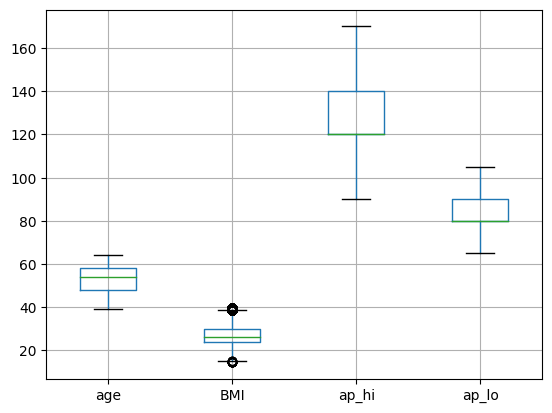

In [32]:
data[["age","BMI","ap_hi","ap_lo"]].boxplot()

In [33]:
data[["age","BMI","ap_hi","ap_lo"]].describe()

,age,BMI,ap_hi,ap_lo
count,62745.000000,62745.000000,62745.000000,62745.000000
mean,52.882413,27.034727,126.404319,81.689537
std,6.746333,4.406103,14.296927,7.673500
min,39.000000,14.479500,90.000000,65.000000
25%,48.000000,23.875115,120.000000,80.000000
50%,54.000000,26.222222,120.000000,80.000000
75%,58.000000,29.757585,140.000000,90.000000
max,64.000000,39.736121,170.000000,105.000000


Checking whether the data set is imbalanced or not

UniVarient Analysis for neumerical data

In [34]:
data['cardio'].value_counts()
#so the data set is balanced

0    31783
1    30962
Name: cardio, dtype: int64

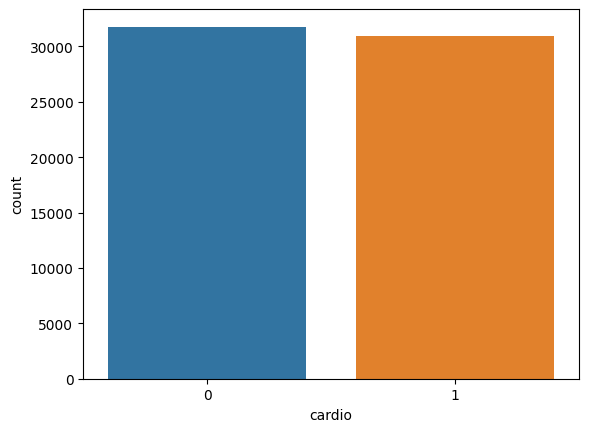

In [35]:
sns.countplot(data=data, x="cardio")
plt.show()

BiVarient Analysis for categorical variables

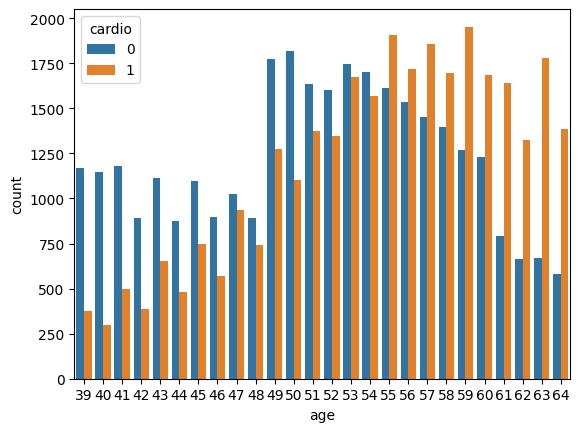

In [36]:
sns.countplot(data=data,x="age",hue="cardio")
plt.show()

when the age is increases the chance of having cardio (yes) is also increases

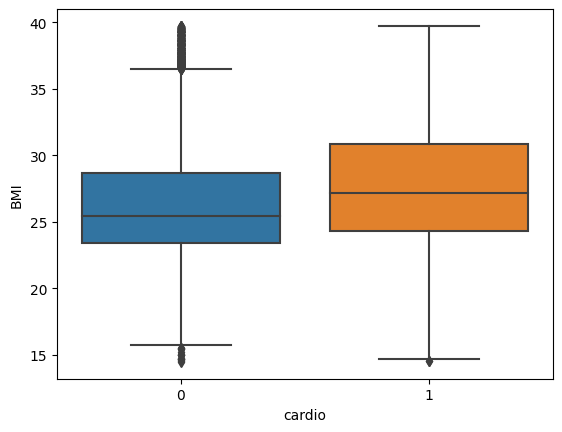

In [37]:
sns.boxplot(data=data,x="cardio",y="BMI")
plt.show()

BMI doesn't highly affect to the cardio affect

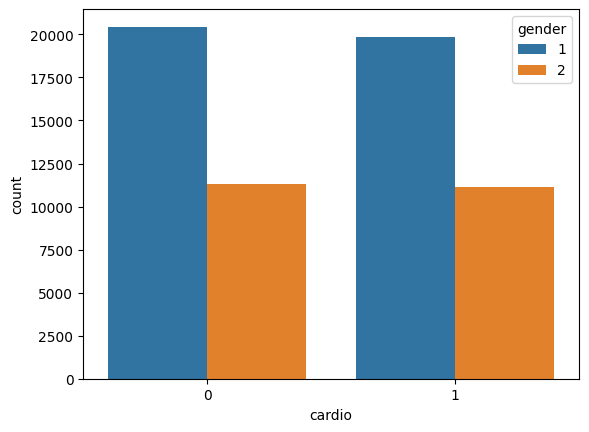

In [38]:
sns.countplot(data=data,x="cardio",hue="gender")
plt.show()

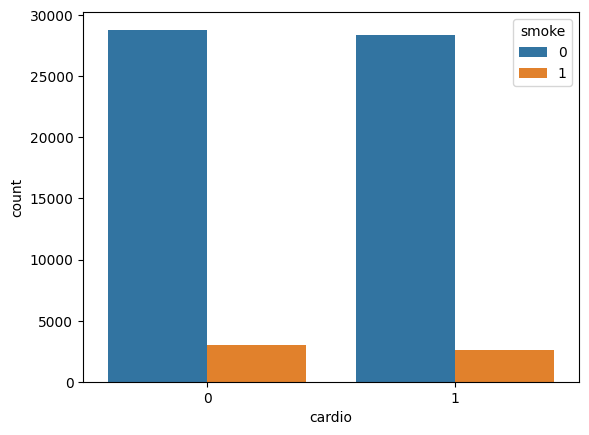

In [39]:
sns.countplot(data=data,x="cardio",hue="smoke")
plt.show()

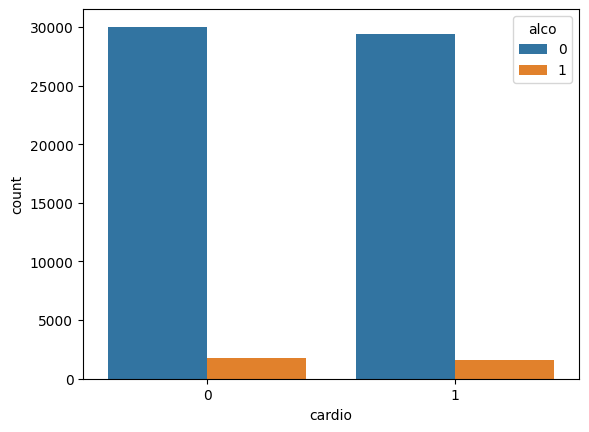

In [40]:
sns.countplot(data=data,x="cardio",hue="alco")
plt.show()

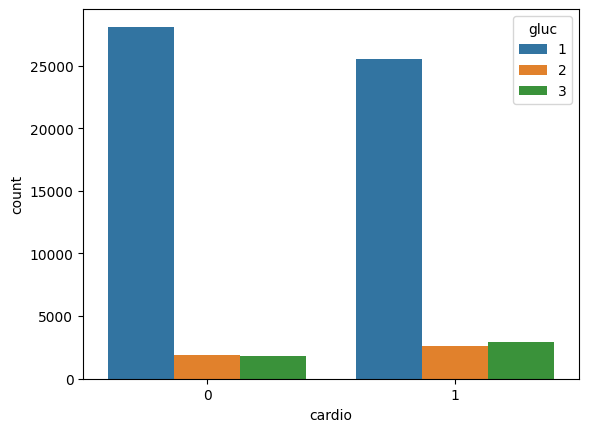

In [41]:
sns.countplot(data=data,x="cardio",hue="gluc")
plt.show()

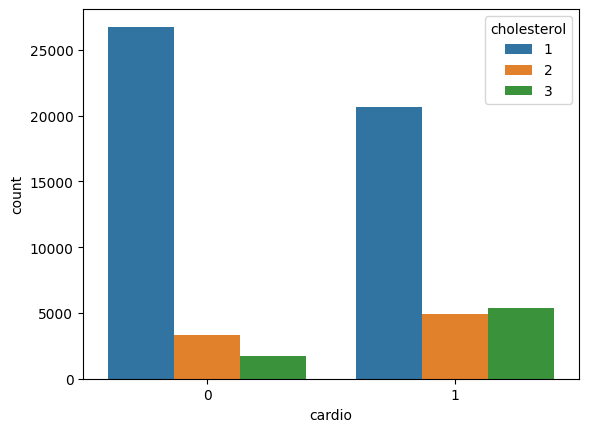

In [42]:

sns.countplot(data=data,x="cardio",hue="cholesterol")
plt.show()

**Checking the Correlation between each variable**

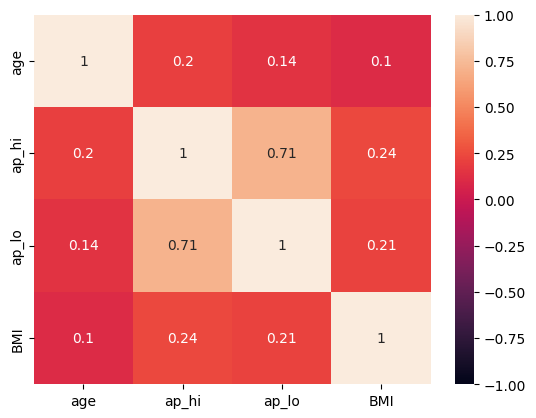

In [43]:
sns.heatmap(data[["age","ap_hi","ap_lo","BMI"]].corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

Relationships between neumerical variables

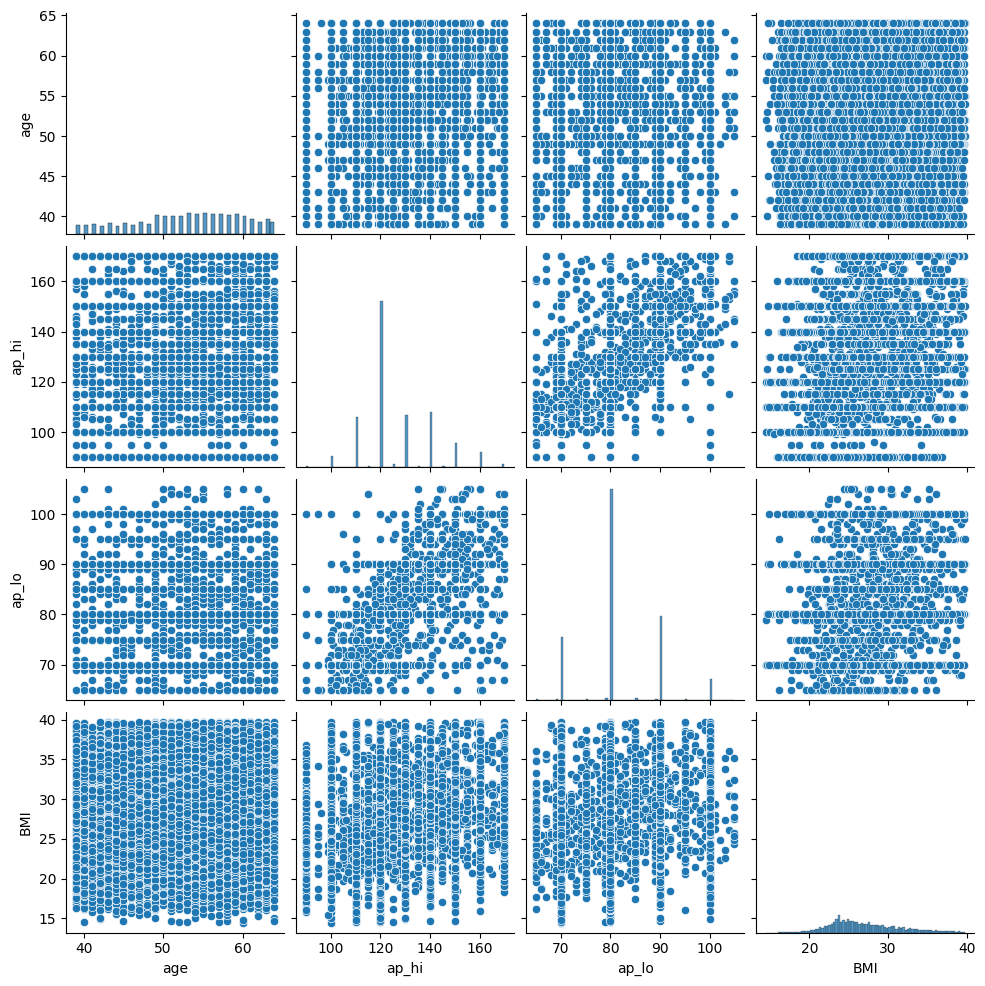

In [44]:
sns.pairplot(data[["age","ap_hi","ap_lo","BMI"]])
plt.show()

In [45]:
df=data[["age","ap_hi","ap_lo","BMI"]]

#convert 1 and 0 in cardio to "Yes" and "NO"
df["cardio"]=["Yes" if m==1 else "No" for m in data["cardio"]]
df.head()

<ipython-input-45-120aa84102a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cardio"]=["Yes" if m==1 else "No" for m in data["cardio"]]


,age,ap_hi,ap_lo,BMI,cardio
0,50,110,80,21.967120,No
1,55,140,90,34.927679,Yes
2,51,130,70,23.507805,Yes
3,48,150,100,28.710479,Yes
5,60,120,80,29.384676,No


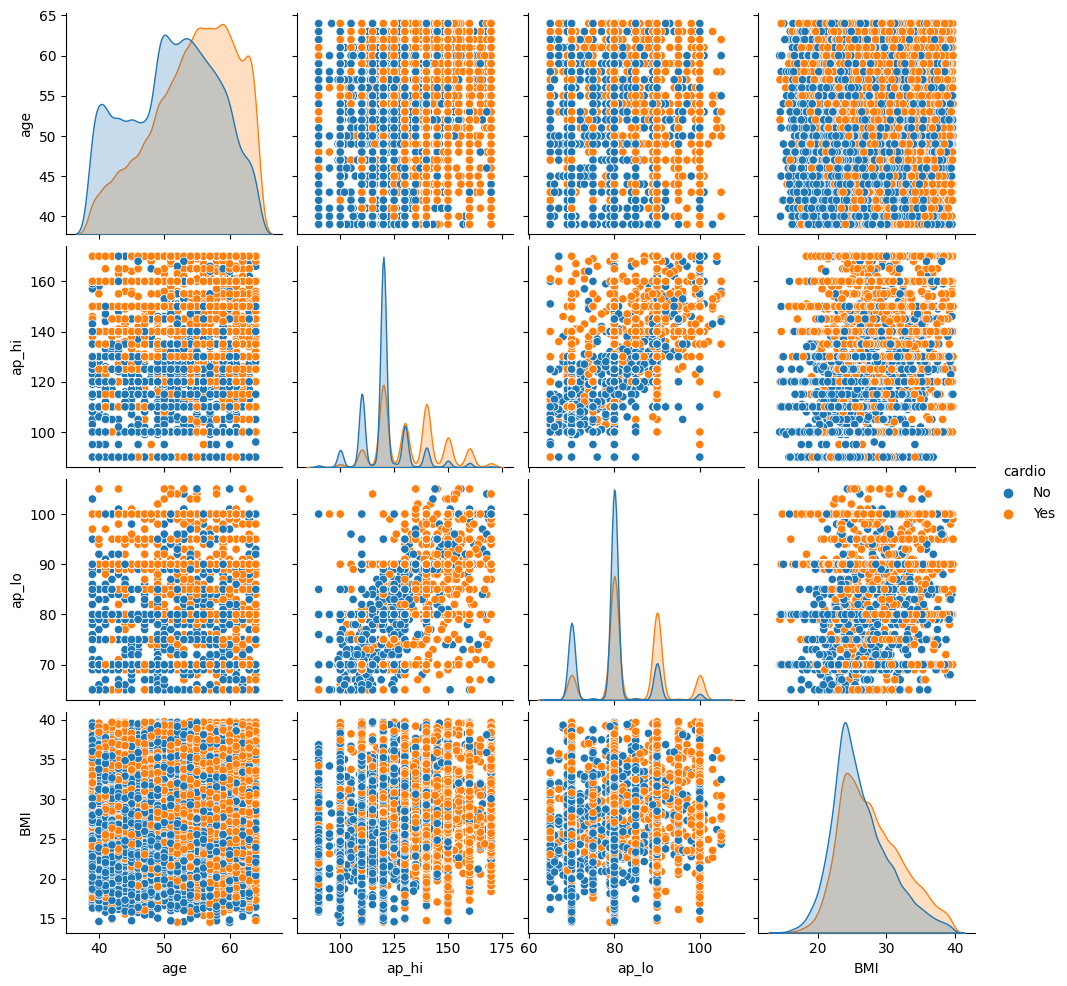

In [46]:
sns.pairplot(df,hue="cardio")
plt.show()

In [47]:
data.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,51,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
5,60,1,120,80,2,2,0,0,0,0,29.384676


reindexing the data set

In [48]:
data=data.reindex(columns=["age","ap_hi","ap_lo","BMI","gender","cholesterol","gluc","smoke","alco","active","cardio"])
data.head()

,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,2,1,1,0,0,1,0
1,55,140,90,34.927679,1,3,1,0,0,1,1
2,51,130,70,23.507805,1,3,1,0,0,0,1
3,48,150,100,28.710479,2,1,1,0,0,1,1
5,60,120,80,29.384676,1,2,2,0,0,0,0


get the value counts in the categorical data

In [49]:
data["gender"].value_counts()

1    40289
2    22456
Name: gender, dtype: int64

In [50]:
data["cholesterol"].value_counts()

1    47420
2     8257
3     7068
Name: cholesterol, dtype: int64

In [51]:
data["smoke"].value_counts()

0    57184
1     5561
Name: smoke, dtype: int64

In [52]:
data["alco"].value_counts()

0    59413
1     3332
Name: alco, dtype: int64

In [53]:
data["active"].value_counts()

1    50465
0    12280
Name: active, dtype: int64

# **MODEL CREATION**

since  i'm using logistic regression algorithm we need dummy data

In [54]:
le=LabelEncoder()

#we only need to convert gender column to dummy , other columns have dummy values by default

data["gender"]=le.fit_transform(data["gender"])
#male = 1   female =0

In [55]:
data.head()

,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0


In [56]:
#one hot encoder
ohe=OneHotEncoder()

In [71]:
ohot_encoded1=ohe.fit_transform(data["cholesterol"].values.reshape(len(data["cholesterol"].values),1)).toarray()
ohot_encoded1=ohot_encoded1[:,1:].astype(int)
df_ohot1=pd.DataFrame(ohot_encoded1,columns=["Above for cholesterol","Well above cholesterol"])
df_ohot1

,Above for cholesterol,Well above cholesterol
0,0,0
1,0,1
2,0,1
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,0,0


In [76]:
ohot_encoded2=ohe.fit_transform(data["gluc"].values.reshape(len(data["gluc"].values),1)).toarray()
ohot_encoded2=ohot_encoded2[:,1:].astype(int)
df_ohot2=pd.DataFrame(ohot_encoded2,columns=["Above normal glucose","Well above normal glucose"])
df_ohot2

,Above normal glucose,Well above normal glucose
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,1,0


In [75]:
ohot_encoded2=ohe.fit_transform(data["gluc"].values.reshape(len(data["gluc"].values),1)).toarray()
ohot_encoded2=ohot_encoded2[:,1:].astype(int)
df_ohot2=pd.DataFrame(ohot_encoded2,columns=["Above normal glucose","Well above normal glucose"])
df_ohot2

,Above normal glucose,Well above normal glucose
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,1,0


In [77]:
data

,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69993,53,130,90,23.661439,0,1,1,0,0,1,1
69994,57,150,80,29.384757,0,1,1,0,0,1,1
69995,52,120,80,26.927438,1,1,1,1,0,1,0
69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [78]:
#resetting the indexes
data.reset_index(inplace=True)
data

,index,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,110,80,21.967120,1,1,1,0,0,1,0
1,1,55,140,90,34.927679,0,3,1,0,0,1,1
2,2,51,130,70,23.507805,0,3,1,0,0,0,1
3,3,48,150,100,28.710479,1,1,1,0,0,1,1
4,5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62740,69993,53,130,90,23.661439,0,1,1,0,0,1,1
62741,69994,57,150,80,29.384757,0,1,1,0,0,1,1
62742,69995,52,120,80,26.927438,1,1,1,1,0,1,0
62743,69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [79]:
#removing the index column
data.drop("index",axis=1,inplace=True)
data

,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
4,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
62740,53,130,90,23.661439,0,1,1,0,0,1,1
62741,57,150,80,29.384757,0,1,1,0,0,1,1
62742,52,120,80,26.927438,1,1,1,1,0,1,0
62743,61,135,80,27.099251,0,1,2,0,0,0,1


separating the cardio column and add df_ohot1 and df_hot2 columns to the dataset.

In [80]:
x=pd.concat([data.iloc[:,:10],df_ohot1,df_ohot2],axis=1)
x.head()

,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,Above for cholesterol,Well above cholesterol,Above normal glucose,Well above normal glucose
0,50,110,80,21.967120,1,1,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,3,1,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,3,1,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,1,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,2,2,0,0,0,1,0,1,0


removing the cholesterol and gluc columns

In [81]:
x.drop(["cholesterol","gluc"],axis=1,inplace=True)
x.head()

,age,ap_hi,ap_lo,BMI,gender,smoke,alco,active,Above for cholesterol,Well above cholesterol,Above normal glucose,Well above normal glucose
0,50,110,80,21.967120,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,0,0,0,1,0,1,0


In [82]:
x=x.values
y=data.iloc[:,10].values

Standarising the Neumerical values

In [86]:
sc=StandardScaler()

In [87]:
x[:,:4]=sc.fit_transform(x[:,:4])

In [99]:
x[:,:4]

array([[-0.42725964, -1.14741093, -0.2201799 , -1.15014289],
       [ 0.31388961,  0.95095888,  1.08301675,  1.79138238],
       [-0.27902979,  0.25150228, -1.52337654, -0.80046937],
       ...,
       [-0.13079994, -0.44795433, -0.2201799 , -0.02435046],
       [ 1.20326872,  0.60123058, -0.2201799 ,  0.01464426],
       [ 0.46211946, -0.44795433, -0.2201799 , -0.48143443]])

Spliting the Data set

In [96]:
#columns except cardio
x

array([[-0.42725964, -1.14741093, -0.2201799 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31388961,  0.95095888,  1.08301675, ...,  1.        ,
         0.        ,  0.        ],
       [-0.27902979,  0.25150228, -1.52337654, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.13079994, -0.44795433, -0.2201799 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.20326872,  0.60123058, -0.2201799 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.46211946, -0.44795433, -0.2201799 , ...,  0.        ,
         0.        ,  0.        ]])

In [95]:
#cardio column
y

array([0, 1, 1, ..., 0, 1, 0])

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [101]:
x_train.shape

(50196, 12)

In [102]:
x_test.shape

(12549, 12)

*Creating the Model Objects*

In [132]:

# Regularization parameter
C = 1.0

# Base models with regularization
model1 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=50))
model2 = make_pipeline(StandardScaler(), LogisticRegression(C=C))
model3 = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=C, probability=True))
model4 = RandomForestClassifier(n_estimators=500)


T1=("knn",model1)
T2=("lgr",model2)
T3=("svm",model3)
T4=("rf",model4)

model=VotingClassifier(estimators=[T1,T2,T3,T4],voting="hard")


fiting the model

In [133]:
model.fit(x_train,y_train)

VotingClassifier(estimators=[('knn',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier(n_neighbors=50))])),
                             ('lgr',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression())])),
                             ('svm',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc', SVC(probability=True))])),
                             ('rf', RandomForestClassifier(n_estimators=500))])

In [134]:
y_pred=model.predict(x_test)

In [136]:
confusion_matrix(y_test,y_pred)

array([[5197, 1218],
       [2234, 3900]])

In [137]:
accuracy_score(y_test,y_pred)

0.7249183201848753

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6415
           1       0.76      0.64      0.69      6134

    accuracy                           0.72     12549
   macro avg       0.73      0.72      0.72     12549
weighted avg       0.73      0.72      0.72     12549

